### Money Vs. Happiness

This notebook is used to explore and prep the data for the Streamlit application used in app.py. In this notebook, I split the sample between records that say they are satisfied with life and records that are not satisfied with life. I attempt to uncover the financial patterns of both groups to see if there is a correlation between life satisfaction and financial status.

Ideas:
- Q1: General statistics
- Q2: financiallly stable people more satisfied with life?
- Q3: financially conscious people more satisfied with life?
- Q4: financially knowledgable people are more satisfied with life?

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

<hr>

### Load the Data

Reference: [National Consumer Financial Well-Being](https://www.consumerfinance.gov/data-research/financial-well-being-survey-data/)  
Score Mapping: [Data Mappings](https://files.consumerfinance.gov/f/documents/NFWBS_PUF_2016_read_in_PY27.py)

In [136]:
data = pd.read_csv("resources/cfwb.csv")

In [137]:
data.head(10)

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668
5,10910,1,3,5,7,5,67,5,1,1,...,1,2,3,0,0,0,0,2,0,0.760061
6,11079,1,3,5,4,7,51,1,3,2,...,1,2,4,0,0,1,1,3,0,1.370522
7,7741,1,3,2,2,2,47,1,2,4,...,1,2,4,0,0,0,0,3,0,1.193365
8,8303,1,3,7,7,7,43,4,5,2,...,1,3,7,0,0,0,1,3,0,2.497838
9,9688,1,3,4,5,4,58,3,3,2,...,1,1,2,0,0,0,0,3,0,1.266602


In [138]:
print(len(data))
print(data.columns.values)

6394
['PUF_ID' 'sample' 'fpl' 'SWB_1' 'SWB_2' 'SWB_3' 'FWBscore' 'FWB1_1'
 'FWB1_2' 'FWB1_3' 'FWB1_4' 'FWB1_5' 'FWB1_6' 'FWB2_1' 'FWB2_2' 'FWB2_3'
 'FWB2_4' 'FSscore' 'FS1_1' 'FS1_2' 'FS1_3' 'FS1_4' 'FS1_5' 'FS1_6'
 'FS1_7' 'FS2_1' 'FS2_2' 'FS2_3' 'SUBKNOWL1' 'ACT1_1' 'ACT1_2' 'FINGOALS'
 'PROPPLAN_1' 'PROPPLAN_2' 'PROPPLAN_3' 'PROPPLAN_4' 'MANAGE1_1'
 'MANAGE1_2' 'MANAGE1_3' 'MANAGE1_4' 'SAVEHABIT' 'FRUGALITY' 'AUTOMATED_1'
 'AUTOMATED_2' 'ASK1_1' 'ASK1_2' 'SUBNUMERACY2' 'SUBNUMERACY1'
 'CHANGEABLE' 'GOALCONF' 'LMscore' 'FINKNOWL1' 'FINKNOWL2' 'FINKNOWL3'
 'FK1correct' 'FK2correct' 'FK3correct' 'KHscore' 'KHKNOWL1' 'KHKNOWL2'
 'KHKNOWL3' 'KHKNOWL4' 'KHKNOWL5' 'KHKNOWL6' 'KHKNOWL7' 'KHKNOWL8'
 'KHKNOWL9' 'KH1correct' 'KH2correct' 'KH3correct' 'KH4correct'
 'KH5correct' 'KH6correct' 'KH7correct' 'KH8correct' 'KH9correct'
 'ENDSMEET' 'HOUSING' 'LIVINGARRANGEMENT' 'HOUSERANGES' 'IMPUTATION_FLAG'
 'VALUERANGES' 'MORTGAGE' 'SAVINGSRANGES' 'PRODHAVE_1' 'PRODHAVE_2'
 'PRODHAVE_3' 'PRODHAVE_4'

In [139]:
questions = {
    "Are you satisfied with your life?": {
        "SWB_1" : "I am satisfied with my life"
    },
    "How would you rate your financial well-being?": {
        "FWBscore": "Financial well-being scale score",
        "ENDSMEET": "Difficulty of covering monthly expenses and bills"
    },
    "How would you rate your ability to recognize financial events?": {
        "FSscore": "Financial skill scale score"
    },
    "How would you rate your financial knowledge": {
        "LMscore": "Lusardi and Mitchell financial knowledge scale score"
    }
}

### Why these metrics?

<strong>SWB_1</strong>: rating of this person's overall satisfaction with life. 1 (strongly disagree), 7 (strongly agree).  
<strong>FWBscore</strong>: out of 100, total of 10 questions rated 1-5, not at all - completely:
- Can you afford an unexpected expense
- Can you buy the things you want in life
- Can you enjoy life because of the way you manage money
- Are you worried your money wont last  

<strong>ENDSMEET</strong>: rates difficulty to make ends meet. 1 (not difficult) 3 (very difficult)  
<strong>FSscore</strong>: rates confidence in financial situations. out of 100, total of 10 questions rated 1-5, not at all - completely
- Can you get yourself through your financial goals
- Can you make complex financial decisions
- Can you make good financial decisions
- Can you control yourself from spending on luxuries
- Can you save when you need to

<strong>LMscore</strong>: lusardi and mitchell financial literacy questions. out of 3
- question about savings interest rate
- interest rates during inflation
- question about stocks

<hr>

### Data Preprocessing

- Create new data frame using only deisred objectives

In [140]:
original_data = data
data = data[['SWB_1', 'FWBscore', 'ENDSMEET', 'FSscore', 'LMscore']]

In [141]:
data.head(10)

,SWB_1,FWBscore,ENDSMEET,FSscore,LMscore
0,5,55,2,44,3
1,6,51,2,43,3
2,4,49,1,42,3
3,6,49,-1,42,2
4,4,49,2,42,1
5,5,67,1,57,3
6,5,51,2,54,3
7,2,47,2,35,3
8,7,43,1,58,2
9,4,58,1,42,3


<hr>

### Overview of Life Satisfaction

In [142]:
data.describe()

,SWB_1,FWBscore,ENDSMEET,FSscore,LMscore
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,5.353769,56.034094,1.444948,50.719112,2.506256
std,1.500913,14.154676,0.661932,12.656921,0.755215
min,-4.000000,-4.000000,-1.000000,-1.000000,0.000000
25%,5.000000,48.000000,1.000000,42.000000,2.000000
50%,6.000000,56.000000,1.000000,50.000000,3.000000
75%,6.000000,65.000000,2.000000,57.000000,3.000000
max,7.000000,95.000000,3.000000,85.000000,3.000000


Key takeaways:
- there is approximately 6,400 records in this sample
- the average life satisfaction score is 5.4 (Slightly Agree)
- financial Well Being score average is 56%
- difficulty to make ends meet average is 1.45 (slightly difficult)
- financial skills score is 50.1% average
- lusardi and mitchell financial literacy questions average is around 2.5

<hr>

### Satisfaction Scores

In [143]:
# dictionary of satisfaction ratings
satisfaction_ratings = data['SWB_1'].value_counts().to_dict()
print(satisfaction_ratings)

{6: 1926, 7: 1535, 5: 1458, 4: 803, 3: 335, 1: 154, 2: 152, -1: 30, -4: 1}


In [144]:
# convert all keys to strings
satisfaction_ratings = {str(key): value for key, value in satisfaction_ratings.items()}
print(satisfaction_ratings)

{'6': 1926, '7': 1535, '5': 1458, '4': 803, '3': 335, '1': 154, '2': 152, '-1': 30, '-4': 1}


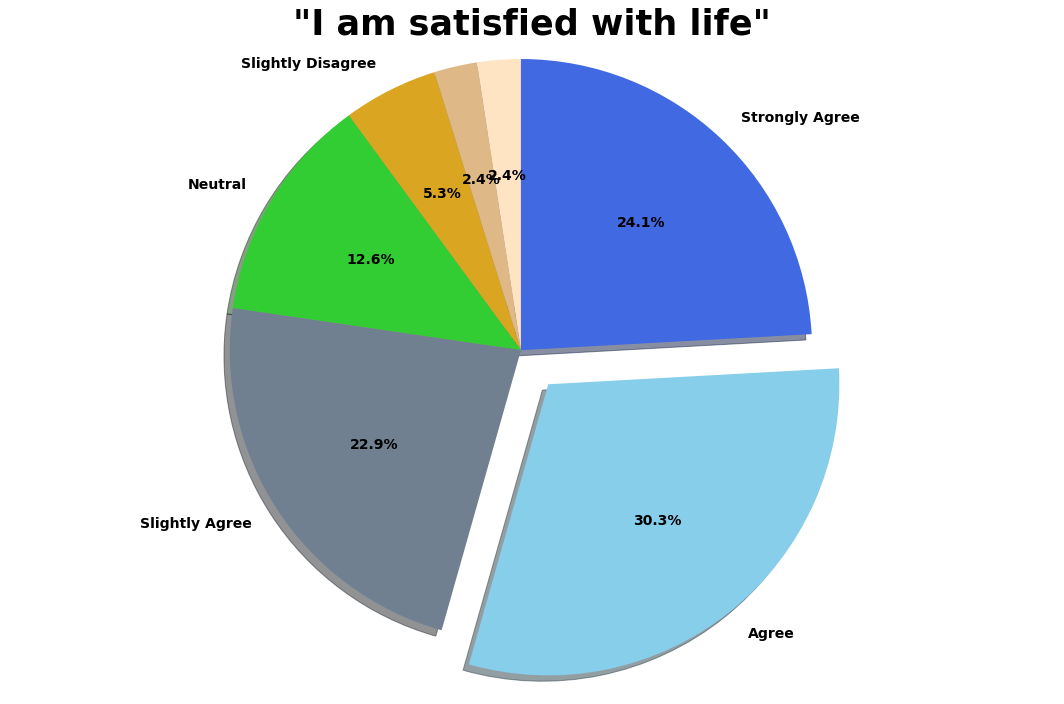

In [147]:
labels = ' ', ' ', 'Slightly Disagree', 'Neutral', 'Slightly Agree', 'Agree', 'Strongly Agree'
sizes = [satisfaction_ratings['1'], satisfaction_ratings['2'], satisfaction_ratings['3'],
        satisfaction_ratings['4'], satisfaction_ratings['5'], satisfaction_ratings['6'], satisfaction_ratings['7']]
explode = (0,0,0,0,0,0.15,0)
fig, ax = plt.subplots(figsize =(15, 10))
colors = ['bisque','burlywood','goldenrod','limegreen','slategray','skyblue','royalblue']
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
ax.set_title('"I am satisfied with life"', fontsize=35,fontweight='bold')
ax.axis('equal')
plt.rcParams.update({'font.size': 14})
plt.tight_layout()
plt.show()